In [7]:
from __future__ import division
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt

In [8]:
w = pd.read_csv("WVS.csv")
w.head()

,V1,V2,V2A,V3,V4,V5,V6,V7,V8,V9,...,V224_ESMA,V228_2,V243_AU,V244_AU,V248_CS,V253_CS,V256B,V256C,sacsecval,secvalwgt
0,6,12,12,1.0,1.0,1.0,1.0,NaN,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.300476,1.0
1,6,12,12,2.0,1.0,2.0,3.0,4.0,2.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.301905,1.0
2,6,12,12,3.0,1.0,3.0,2.0,4.0,2.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.386071,1.0
3,6,12,12,4.0,1.0,1.0,3.0,4.0,3.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.344405,1.0
4,6,12,12,5.0,1.0,1.0,1.0,2.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.304167,1.0


### 1. Run a simple regression, with at least two Xs in it, and interpret your results. (Did the results fit your expectations? Why? Why not?)

The dependent variable (y) I choose is: whether you think stealing property can always be justified (10), never be justified (1), or something in between. (V200) I expect that Americans think stealing property is more justifiable, compared with Chinese people, as the wealth gap in America may be greater. And regardless of country, I expect that people with a higher income think stealing property is less justifiable.

In [9]:
w.rename(columns={'V200':'stealing',
                  'V239':'ses',
                  'V2':'country'},
                  inplace=True)

In [10]:
lm1 = smf.ols(formula = 'stealing ~ ses + C(country)', data = w, subset = ((w['country']==156) | (w['country']==840))).fit()
print (lm1.summary())

                            OLS Regression Results                            
Dep. Variable:               stealing   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     6.196
Date:                Sun, 12 Nov 2023   Prob (F-statistic):            0.00206
Time:                        04:44:30   Log-Likelihood:                -7111.6
No. Observations:                3884   AIC:                         1.423e+04
Df Residuals:                    3881   BIC:                         1.425e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             1.5784      0.06

The results suggest that, net of income, Americans (country=840) are 0.127 points lower on the sense of the justifiability of stealing property than Chinese people on average. This does not fit my expectation since Americans think stealing property is less justifiable, compared with Chinese people. Then, net of country, people with a higher income level are 0.036 points higher on the sense of the justifiability of stealing property on average. This also doesn't fit my expectation, as richer people think stealing property is more justifiable. Both of these results are statistically significant with p-values < 0.05. And the r-squared is 0.003, meaning that only 0.3% of the variation in the sense of the justifiability of stealing property are shown by Xs in the model.

### 2. Add an interaction term to that model that you think might moderate the original relationship between X1 and X2. Explain why you think an interaction might be present and in what direction it would work. Explain your results. Did it work out? Yes? No?

I add an interaction between income and country because it is still possible that as people's income increases, stealing property becomes more justifiable in America than in China.

In [11]:
lm3 = smf.ols(formula = 'stealing ~ ses*C(country)', data = w, subset = ((w['country']==156) | (w['country']==840)) ).fit()
print (lm3.summary())

                            OLS Regression Results                            
Dep. Variable:               stealing   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     4.143
Date:                Sun, 12 Nov 2023   Prob (F-statistic):            0.00610
Time:                        04:44:30   Log-Likelihood:                -7111.5
No. Observations:                3884   AIC:                         1.423e+04
Df Residuals:                    3880   BIC:                         1.426e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 1.56

The interaction shows that each time people have a higher income level, stealing property is 0.005 less justifiable in America than in China on average. It is not statistically significant since p-value = 0.839. So there is no evidence that as people's income increases, stealing property is more justifiable in America than in China.

### 3. Extra Credit: Plot the relationship found in the interaction.

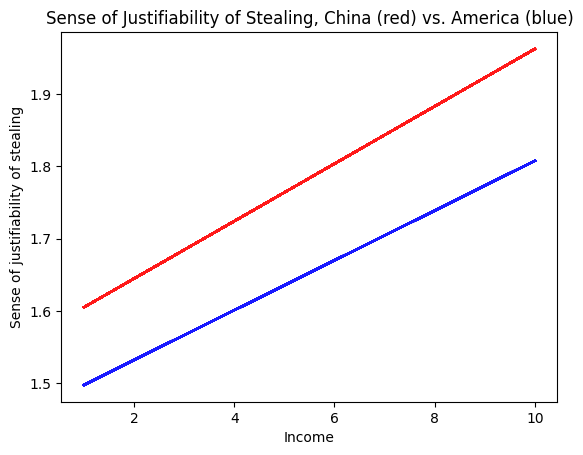

In [12]:
plt.plot(w["ses"], lm3.params[0] + lm3.params[1] * 1 + lm3.params[2] * w["ses"] + lm3.params[3] * 1 * w["ses"], 'b', label = 'America', alpha = 0.9)
plt.plot(w["ses"], lm3.params[0] + lm3.params[1] * 0 + lm3.params[2] * w["ses"] + lm3.params[3] * 0 * w["ses"], 'r', label = 'China', alpha = 0.9)
plt.title("Sense of Justifiability of Stealing, China (red) vs. America (blue)")
plt.xlabel("Income")
plt.ylabel("Sense of justifiability of stealing")
plt.show()